In [2]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [5]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def LR_fit(X, y, learning_rate=0.01, epochs=1000):

    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    bias = 0

    for _ in range(epochs):

      linear_model = np.dot(X, theta) + bias
      y_pred = sigmoid(linear_model)

      dtheta = (1 / num_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / num_samples) * np.sum(y_pred - y)

      theta -= learning_rate * dtheta
      bias -= learning_rate * db

    return theta, bias
    def LR_predict(X, theta, bias):
     z = np.dot(X, theta) + bias
     h = sigmoid(z)
     return (h >= 0.5).astype(int)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['diabetes','gender','smoking_history'], axis = 1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

theta,bias = LR_fit(X_train,y_train,learning_rate=0.001, epochs=1000)
print('theta',theta,'\n','bias',bias)

y_pred=LR_predict(X_test,theta,bias)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df

accuray=np.mean(y_test==y_pred)
('accuray',accuray)

theta [ 0.02508241  0.01173447  0.00717951 -0.1503071  -0.04411408  0.01111289] 
 bias -0.02978724279905487


('accuray', 0.9118)

<Axes: >

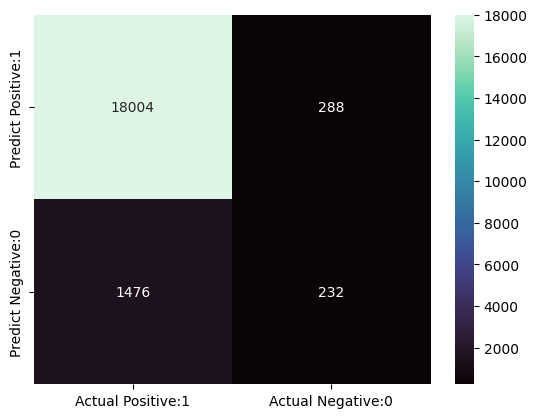

In [9]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')